<a href="https://colab.research.google.com/github/ektaarora3501/tensorflow/blob/master/House_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.common import EmptyDataError

In [4]:
from google.colab import files
uploaded=files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [0]:
import io
df2=io.BytesIO(uploaded['kc_house_data.csv'])

'''try:
   data= pd.read_csv(df2, error_bad_lines=False)
except pd.io.common.EmptyDataError:
   df = pd.DataFrame()'''


data = pd.read_csv(df2,error_bad_lines=False,delim_whitespace=True)
#data['sqft_div']=np.ceil(data['sqft_living']/1000)
#data['sqft_div'].head() #generating snapshot of  data set3
#data.info()
#data.plot(kind="scatter",x="long",y="lat")

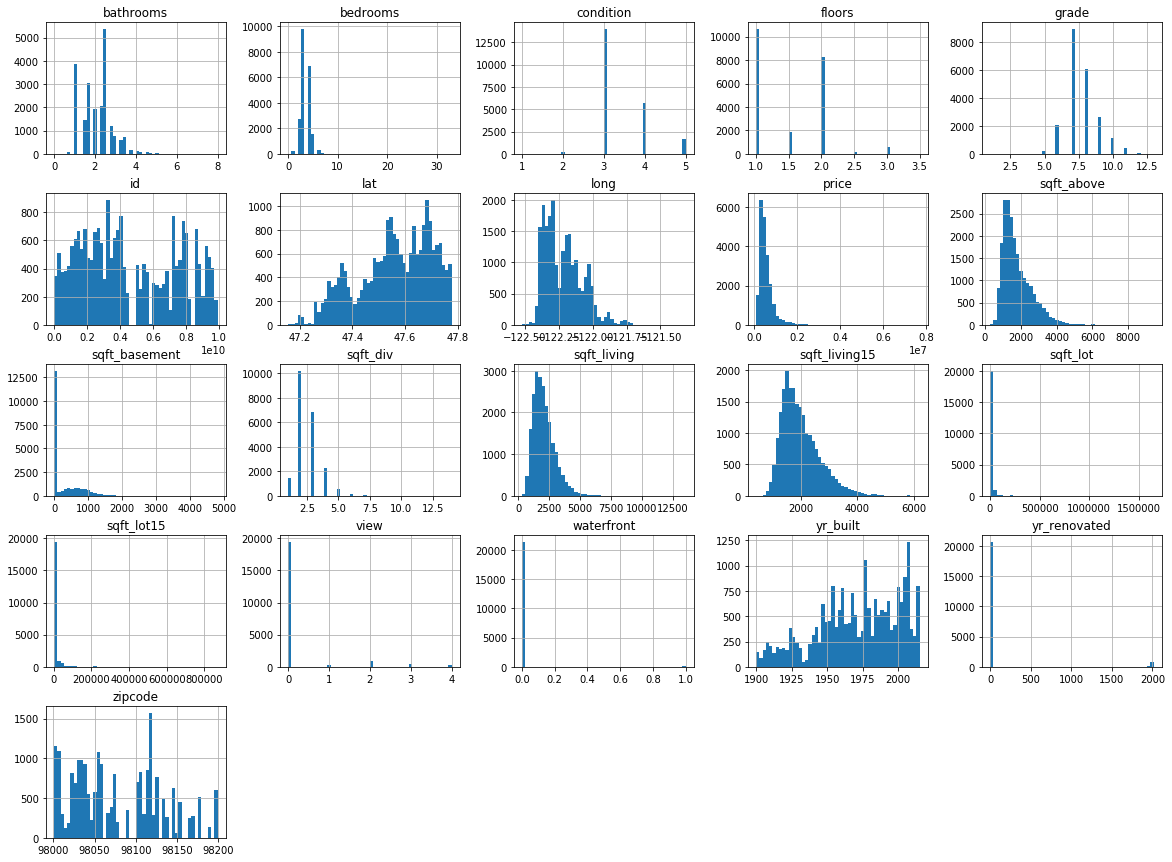

In [0]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [0]:
'''def split_train_test(data,test_ratio):
  shuffled_indices=np.random.permutation(len(data))
  test_set_size=int(len(data)*test_ratio)
  test_indices=shuffled_indices[:test_set_size]
  train_indices=shuffled_indices[test_set_size:]
  return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set=split_train_test(data,0.2)
print(len(train_set),len(test_set))'''

# the problem with above method is on every call it will reshuffle the data 
# to avoid that we are going to use sklearn's inbuilt model
  

17291 4322


In [0]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(data,test_size=0.2,random_state=42)


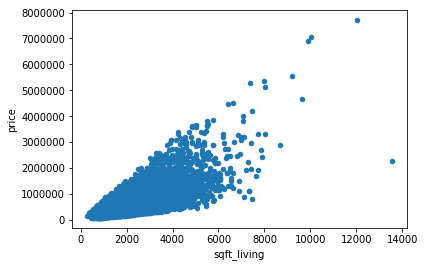

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

'''split =StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data['sqft_div']):
  strat_train_set=data.loc[train_index]
  strat_test_set=data.loc[test_index]
  
print(data['sqft_div'].value_counts()/len(data))  '''

data.plot(kind='scatter',x='sqft_living',y='price')
plt.show()

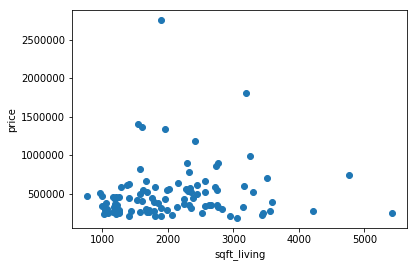

In [23]:
import io
df2=io.BytesIO(uploaded['kc_house_data.csv'])
x_train=pd.read_csv(df2,usecols=[5],skiprows=[0],nrows=100,header=None)
y_train=pd.read_csv(df2,usecols=[2],skiprows=[0],nrows=100,header=None)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.scatter(x_train,y_train)
plt.show()